In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 상위 10명 랭커 데이터

**데이터 위치 옮겼음**

In [2]:
# 상위 랭커 게임 기록 데이터 로드
top10_ranker_game = pd.read_csv('C:/Users/user/Desktop/데이터분석 직무 공부/넥슨 데이터 분석 공부/Nexon FC Online Ranker match result/FC Online User game log data/top10_ranker_game.csv')

In [3]:
# 정보 확인
top10_ranker_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   920 non-null    object 
 1   matchDate                 920 non-null    object 
 2   ouid                      920 non-null    object 
 3   nickname                  920 non-null    object 
 4   seasonId                  920 non-null    int64  
 5   matchResult               920 non-null    object 
 6   matchEndType              920 non-null    int64  
 7   systemPause               908 non-null    float64
 8   foul                      908 non-null    float64
 9   injury                    908 non-null    float64
 10  redCards                  908 non-null    float64
 11  yellowCards               908 non-null    float64
 12  dribble                   908 non-null    float64
 13  cornerKick                908 non-null    float64
 14  possession

In [4]:
# 게임 결과 비율 확인
top10_ranker_game.dropna(axis=0, inplace=True)
top10_ranker_game['matchResult'].value_counts(normalize=True)

matchResult
승    0.500000
패    0.488987
무    0.011013
Name: proportion, dtype: float64

**경기 결과 시각화**

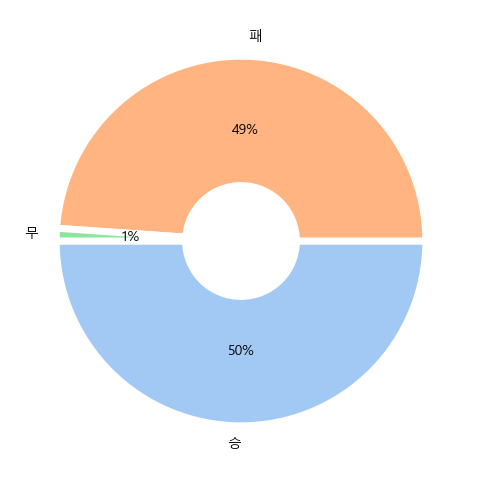

In [5]:
# matchResult 비율 계산
match_result_counts = top10_ranker_game['matchResult'].value_counts(normalize=True)

labels = match_result_counts.index.tolist()
colors = sns.color_palette('pastel')[0:5]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(6, 6))
plt.pie(match_result_counts, labels=labels, colors = colors, autopct='%.0f%%', wedgeprops=wedgeprops, startangle=180)
plt.show()

In [6]:
top10_game = top10_ranker_game.copy()

# matchDate 년, 월, 일, 시간대 분할
top10_game['matchDate'] = pd.to_datetime(top10_game['matchDate'])

# 연도, 월, 일, 시간대 정보 추출
top10_game['year'] = top10_game['matchDate'].dt.year
top10_game['month'] = top10_game['matchDate'].dt.month
top10_game['day'] = top10_game['matchDate'].dt.day
top10_game['hour'] = top10_game['matchDate'].dt.hour

top10_game.drop(['matchId', 'matchDate', 'ouid'], axis=1, inplace=True)
top10_game

nickname  seasonId matchResult  matchEndType  systemPause  foul  injury  \
0        KT곽준혁    202411           패             0          0.0   0.0     0.0   
1       이터니티리안    202411           승             0          0.0   0.0     1.0   
2        KT곽준혁    202411           패             0          0.0   0.0     0.0   
3    lilmixmix    202411           승             0          0.0   0.0     0.0   
4        KT곽준혁    202411           승             0          0.0   2.0     0.0   
..         ...       ...         ...           ...          ...   ...     ...   
915   오예스쿠키앤크림    202410           승             0          0.0   1.0     0.0   
916   Innate강혁    202410           패             2          1.0   0.0     1.0   
917    CHEMI황소    202410           승             1          0.0   1.0     0.0   
918   Innate강혁    202410           패             0          0.0   0.0     0.0   
919        보물섬    202410           승             0          0.0   1.0     0.0   

     redCards  yellowCards  dribble  ...  lobbedThroughPassTry  \
0         0.0          0.0     76.0  ...                   0.0   
1         0.0          0.0     66.0  ...                   0.0   
2         0.0          0.0     74.0  ...                   1.0   
3         0.0          0.0     89.0  ...                   0.0   
4         0.0          0.0     67.0  ...                   0.0   
..        ...          ...      ...  ...                   ...   
915       0.0          0.0     78.0  ...                   0.0   
916       0.0          0.0     57.0  ...                   0.0   
917       0.0          0.0     47.0  ...                   0.0   
918       0.0          0.0     78.0  ...                   1.0   
919       0.0          0.0     75.0  ...                   0.0   

     lobbedThroughPassSuccess  blockTry  blockSuccess tackleTry  \
0                         0.0      10.0           0.0      11.0   
1                         0.0       9.0           1.0      12.0   
2                         0.0      13.0           1.0      20.0   
3                         0.0       9.0           1.0      10.0   
4                         0.0       9.0           1.0      15.0   
..                        ...       ...           ...       ...   
915                       0.0       9.0           0.0      11.0   
916                       0.0       6.0           0.0      19.0   
917                       0.0       5.0           0.0      18.0   
918                       0.0      13.0           0.0      18.0   
919                       0.0      13.0           0.0      11.0   

     tackleSuccess  year  month  day  hour  
0              5.0  2024     10   17    17  
1             10.0  2024     10   17    17  
2             10.0  2024     10   17     7  
3              6.0  2024     10   17     7  
4              9.0  2024     10   17     7  
..             ...   ...    ...  ...   ...  
915            6.0  2024     10   11    16  
916            8.0  2024     10   11    16  
917            8.0  2024     10   11    16  
918            7.0  2024     10   11    16  
919            8.0  2024     10   11    16  

[908 rows x 53 columns]

# 상관분석
## 경기 결과에 가장 영향을 주는 요인은 무엇일까?

In [7]:
## 상관분석
PSI_corr = pd.DataFrame()
PSI_corr

df = top10_game.drop('nickname', axis=1)
df = pd.get_dummies(df, columns=['matchResult', 'controller'], drop_first=True, dtype=int)

Y = df['matchResult_승']

for item in df.drop(columns=['matchResult_승', 'matchResult_패']).columns :
    X = df[item].values
    new_data = {
        'variable' : [item],
        'Correlation' : [round(stats.pearsonr(X, Y)[0], 2)],
        'p-value' : [round(stats.pearsonr(X, Y)[1], 3)]
    }
   
    new_df = pd.DataFrame(new_data)
    PSI_corr = pd.concat([PSI_corr, new_df])

j = len(PSI_corr)
PSI_corr = PSI_corr.reset_index(drop=True)

for i in range(0, j) :
    if PSI_corr['p-value'][i] >= 0.05 or pd.isna(PSI_corr['p-value'][i]) :
        PSI_corr = PSI_corr.drop(i)
#     else :
#         if PSI_corr['Correlation'][i] > -0.35 and PSI_corr['Correlation'][i] < 0.35 :
#             PSI_corr = PSI_corr.drop(i)

PSI_corr = PSI_corr.sort_values('Correlation', ascending = False)
PSI_corr = PSI_corr.reset_index(drop=True)
PSI_corr

variable  Correlation  p-value
0              averageRating         0.77    0.000
1                  goalTotal         0.67    0.000
2           goalTotalDisplay         0.65    0.000
3              goalInPenalty         0.62    0.000
4        effectiveShootTotal         0.48    0.000
5             shootInPenalty         0.47    0.000
6                 shootTotal         0.41    0.000
7             goalOutPenalty         0.24    0.000
8                 possession         0.23    0.000
9                goalHeading         0.22    0.000
10             tackleSuccess         0.20    0.000
11              shootHeading         0.17    0.000
12    bouncingLobPassSuccess         0.17    0.000
13        bouncingLobPassTry         0.15    0.000
14                 tackleTry         0.15    0.000
15           goalPenaltyKick         0.11    0.001
16        throughPassSuccess         0.08    0.015
17           longPassSuccess         0.07    0.037
18          shootPenaltyKick         0.07    0.033
19           shootOutPenalty         0.07    0.034
20  lobbedThroughPassSuccess         0.07    0.049
21               passSuccess        -0.08    0.021
22                   passTry        -0.09    0.005
23                  blockTry        -0.12    0.000
24          shortPassSuccess        -0.13    0.000
25              matchEndType        -0.14    0.000
26              shortPassTry        -0.14    0.000
27               systemPause        -0.20    0.000
28       controller_keyboard        -0.22    0.000

## ------------------------------------------------------------------------------------

# 하위랭커 9명 랭커 데이터

In [8]:
# 9992 ~ 10000명의 게임 기록 데이터 로드
low_ranker_game = pd.read_csv('C:/Users/user/Desktop/데이터분석 직무 공부/넥슨 데이터 분석 공부/Nexon FC Online Ranker match result/FC Online User game log data/mid_8ranker_game.csv')

In [9]:
low_ranker_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   608 non-null    object 
 1   matchDate                 608 non-null    object 
 2   ouid                      608 non-null    object 
 3   nickname                  608 non-null    object 
 4   seasonId                  608 non-null    int64  
 5   matchResult               608 non-null    object 
 6   matchEndType              608 non-null    int64  
 7   systemPause               601 non-null    float64
 8   foul                      601 non-null    float64
 9   injury                    601 non-null    float64
 10  redCards                  601 non-null    float64
 11  yellowCards               601 non-null    float64
 12  dribble                   601 non-null    float64
 13  cornerKick                601 non-null    float64
 14  possession

In [10]:
# 게임 결과 비율 확인
low_ranker_game.dropna(axis=0, inplace=True)
low_ranker_game['matchResult'].value_counts(normalize=True)

matchResult
승    0.435940
패    0.420965
무    0.143095
Name: proportion, dtype: float64

**경기 결과 시각화**

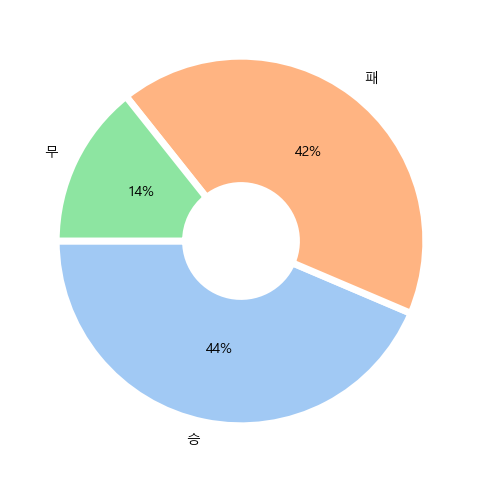

In [11]:
# matchResult 비율 계산
match_result_counts2 = low_ranker_game['matchResult'].value_counts(normalize=True)

labels2 = match_result_counts2.index.tolist()

plt.figure(figsize=(6, 6))
plt.pie(match_result_counts2, labels=labels2, colors = colors, autopct='%.0f%%', wedgeprops=wedgeprops, startangle=180)
plt.show()

In [12]:
low_game = low_ranker_game.copy()

# matchDate 년, 월, 일, 시간대 분할
low_game['matchDate'] = pd.to_datetime(low_game['matchDate'])

# 연도, 월, 일, 시간대 정보 추출
low_game['year'] = low_game['matchDate'].dt.year
low_game['month'] = low_game['matchDate'].dt.month
low_game['day'] = low_game['matchDate'].dt.day
low_game['hour'] = low_game['matchDate'].dt.hour

low_game.drop(['matchId', 'matchDate', 'ouid'], axis=1, inplace=True)
low_game.head()

nickname  seasonId matchResult  matchEndType  systemPause  foul  injury  \
0     GUl멘    202410           승             0          0.0   1.0     0.0   
1    오늘의FC    202410           패             0          0.0   2.0     0.0   
2     GUl멘    202410           무             0          0.0   0.0     0.0   
3  솔뫼초5문수혁    202410           무             0          1.0   0.0     0.0   
4     GUl멘    202410           승             1          0.0   0.0     0.0   

   redCards  yellowCards  dribble  ...  lobbedThroughPassTry  \
0       0.0          0.0     96.0  ...                   0.0   
1       0.0          0.0     82.0  ...                   0.0   
2       0.0          0.0     81.0  ...                   0.0   
3       0.0          0.0     87.0  ...                   0.0   
4       0.0          0.0     80.0  ...                   0.0   

   lobbedThroughPassSuccess  blockTry  blockSuccess tackleTry  tackleSuccess  \
0                       0.0       7.0           2.0       8.0            4.0   
1                       0.0       6.0           0.0       6.0            3.0   
2                       0.0      13.0           2.0       3.0            2.0   
3                       0.0       8.0           1.0      11.0            7.0   
4                       0.0       7.0           1.0       8.0            8.0   

   year  month  day  hour  
0  2024     10    2    13  
1  2024     10    2    13  
2  2024     10    2    13  
3  2024     10    2    13  
4  2024     10    2    13  

[5 rows x 53 columns]

In [13]:
PSI_corr2 = pd.DataFrame()
PSI_corr2

df2 = low_game.drop('nickname', axis=1)
df2 = pd.get_dummies(df2, columns=['matchResult', 'controller'], drop_first=True, dtype=int)

Y = df2['matchResult_승']

for item in df2.drop(columns=['matchResult_승', 'matchResult_패']).columns :
    X = df2[item].values
    new_data2 = {
        'variable' : [item],
        'Correlation' : [round(stats.pearsonr(X, Y)[0], 2)],
        'p-value' : [round(stats.pearsonr(X, Y)[1], 3)]
    }
   
    new_df2 = pd.DataFrame(new_data2)
    PSI_corr2 = pd.concat([PSI_corr2, new_df2])

j = len(PSI_corr2)
PSI_corr2 = PSI_corr2.reset_index(drop=True)

for i in range(0, j) :
    if PSI_corr2['p-value'][i] >= 0.05 or pd.isna(PSI_corr2['p-value'][i]) :
        PSI_corr2 = PSI_corr2.drop(i)

PSI_corr2 = PSI_corr2.sort_values('Correlation', ascending = False)
PSI_corr2 = PSI_corr2.reset_index(drop=True)
PSI_corr2

variable  Correlation  p-value
0            averageRating         0.70    0.000
1         goalTotalDisplay         0.61    0.000
2                goalTotal         0.59    0.000
3            goalInPenalty         0.56    0.000
4      effectiveShootTotal         0.42    0.000
5           shootInPenalty         0.41    0.000
6               shootTotal         0.36    0.000
7               possession         0.29    0.000
8              goalHeading         0.20    0.000
9          longPassSuccess         0.17    0.000
10  bouncingLobPassSuccess         0.15    0.000
11              cornerKick         0.13    0.002
12      bouncingLobPassTry         0.13    0.001
13            shootHeading         0.12    0.003
14                 dribble         0.12    0.002
15          goalOutPenalty         0.12    0.002
16        shootPenaltyKick         0.12    0.003
17             passSuccess         0.11    0.007
18      throughPassSuccess         0.10    0.013
19          throughPassTry         0.09    0.034
20         goalPenaltyKick         0.09    0.030
21                 passTry         0.09    0.036
22           tackleSuccess         0.08    0.046
23             longPassTry         0.08    0.044
24             systemPause        -0.10    0.010

# ------------------------------------------------------------------------------

## 상위 랭커와 하위 랭커 상관 분석 후, 두 유저 층에서 동시에 나타나는 유의한 변수(상관계수 : 0.1 이상인 변수만)

In [14]:
PSI_corr_filtered = PSI_corr[PSI_corr['Correlation'] >= 0.1]
PSI_corr2_filtered = PSI_corr2[PSI_corr2['Correlation'] >= 0.1]

# 공통 변수 찾기
matching_variables = set(PSI_corr_filtered['variable']).intersection(set(PSI_corr2_filtered['variable']))
matching_variables

{'averageRating',
 'bouncingLobPassSuccess',
 'bouncingLobPassTry',
 'effectiveShootTotal',
 'goalHeading',
 'goalInPenalty',
 'goalOutPenalty',
 'goalTotal',
 'goalTotalDisplay',
 'possession',
 'shootHeading',
 'shootInPenalty',
 'shootTotal'}

## 가설 : 상관분석에서 유의한 변수들이 집단 간 차이가 있을까?

In [15]:
# 승리한 경우의 데이터를 가져오기
top_corr = top10_game[top10_game['matchResult'] == '승'][list(matching_variables)]
top_corr

goalTotalDisplay  bouncingLobPassTry  shootHeading  possession  \
1                   2                 0.0           1.0        48.0   
3                   4                 0.0           0.0        56.0   
4                   3                 1.0           2.0        50.0   
7                   5                 0.0           2.0        49.0   
9                   4                 1.0           1.0        54.0   
..                ...                 ...           ...         ...   
910                 3                 0.0           1.0        63.0   
913                 4                 0.0           0.0        55.0   
915                 2                 0.0           1.0        55.0   
917                 3                 0.0           0.0        52.0   
919                 4                 0.0           2.0        52.0   

     effectiveShootTotal  averageRating  goalInPenalty  goalHeading  \
1                    5.0        4.22778            2.0          0.0   
3                    6.0        4.20000            4.0          0.0   
4                    9.0        4.33889            3.0          0.0   
7                    9.0        4.78333            5.0          0.0   
9                    5.0        4.48333            4.0          1.0   
..                   ...            ...            ...          ...   
910                  5.0        4.50000            3.0          1.0   
913                  5.0        4.36667            3.0          0.0   
915                  5.0        4.18333            2.0          0.0   
917                  4.0        4.60556            4.0          0.0   
919                  6.0        4.32222            2.0          1.0   

     shootInPenalty  goalTotal  shootTotal  bouncingLobPassSuccess  \
1               4.0        2.0         5.0                     0.0   
3               5.0        4.0         7.0                     0.0   
4               6.0        3.0        13.0                     0.0   
7               9.0        5.0        14.0                     0.0   
9               4.0        4.0         5.0                     1.0   
..              ...        ...         ...                     ...   
910             4.0        4.0         5.0                     0.0   
913             3.0        4.0         6.0                     0.0   
915             5.0        2.0         7.0                     0.0   
917             4.0        4.0         4.0                     0.0   
919             4.0        4.0         7.0                     0.0   

     goalOutPenalty  
1               0.0  
3               0.0  
4               0.0  
7               0.0  
9               0.0  
..              ...  
910             1.0  
913             1.0  
915             0.0  
917             0.0  
919             2.0  

[454 rows x 13 columns]

In [16]:
# 승리한 경우의 데이터를 가져오기
low_corr = low_game[low_game['matchResult'] == '승'][list(matching_variables)]
low_corr

goalTotalDisplay  bouncingLobPassTry  shootHeading  possession  \
0                   2                 0.0           0.0        52.0   
4                   3                 0.0           0.0        48.0   
6                   3                 0.0           0.0        58.0   
9                   4                 1.0           0.0        45.0   
10                  3                 0.0           1.0        61.0   
..                ...                 ...           ...         ...   
598                 3                 1.0           1.0        54.0   
600                 3                 1.0           1.0        49.0   
603                 3                 1.0           3.0        49.0   
604                 3                 0.0           1.0        48.0   
607                 3                 0.0           0.0        48.0   

     effectiveShootTotal  averageRating  goalInPenalty  goalHeading  \
0                    4.0        4.22222            1.0          0.0   
4                    9.0        4.83333            2.0          0.0   
6                    5.0        4.66111            2.0          0.0   
9                    4.0        4.25556            2.0          0.0   
10                   2.0        4.42778            1.0          0.0   
..                   ...            ...            ...          ...   
598                  5.0        4.08889            2.0          0.0   
600                  6.0        4.44444            1.0          0.0   
603                  6.0        4.53333            3.0          0.0   
604                  7.0        4.29444            3.0          1.0   
607                 10.0        4.66111            6.0          0.0   

     shootInPenalty  goalTotal  shootTotal  bouncingLobPassSuccess  \
0               2.0        2.0         4.0                     0.0   
4               6.0        5.0        10.0                     0.0   
6               5.0        3.0         6.0                     0.0   
9               3.0        4.0         5.0                     1.0   
10              3.0        1.0         3.0                     0.0   
..              ...        ...         ...                     ...   
598             6.0        3.0         9.0                     0.0   
600             2.0        3.0         7.0                     0.0   
603             8.0        3.0        11.0                     0.0   
604             7.0        3.0        11.0                     0.0   
607             9.0        7.0        10.0                     0.0   

     goalOutPenalty  
0               0.0  
4               3.0  
6               1.0  
9               2.0  
10              0.0  
..              ...  
598             1.0  
600             1.0  
603             0.0  
604             0.0  
607             1.0  

[262 rows x 13 columns]

**AB 테스트 시각화**

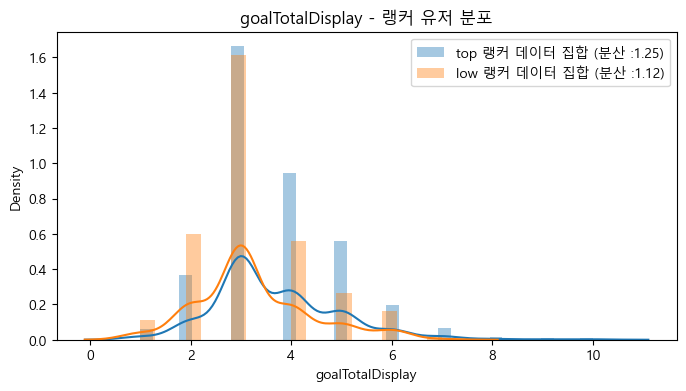

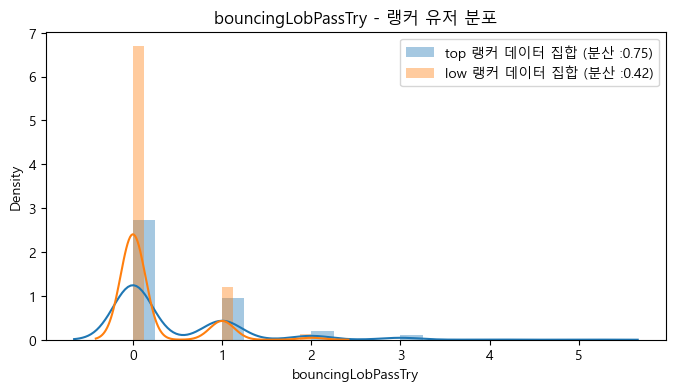

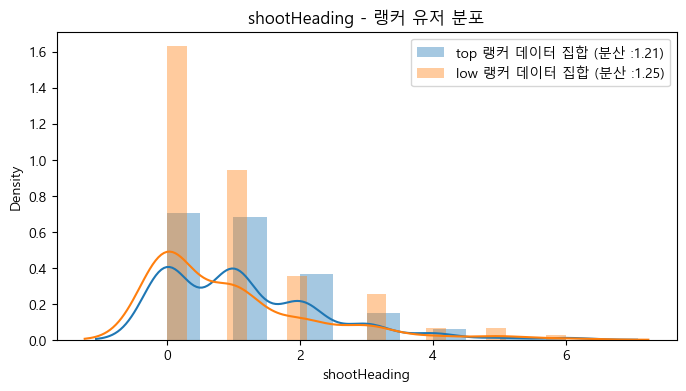

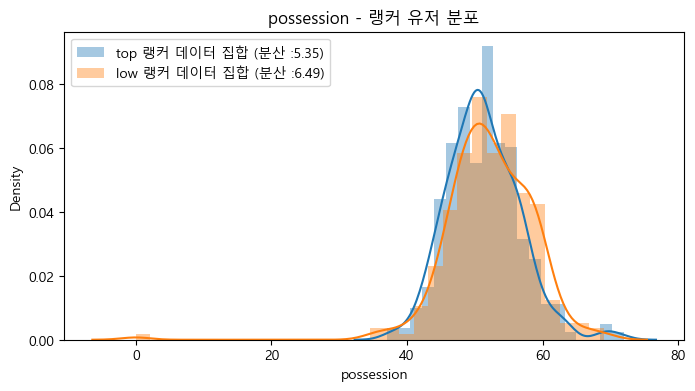

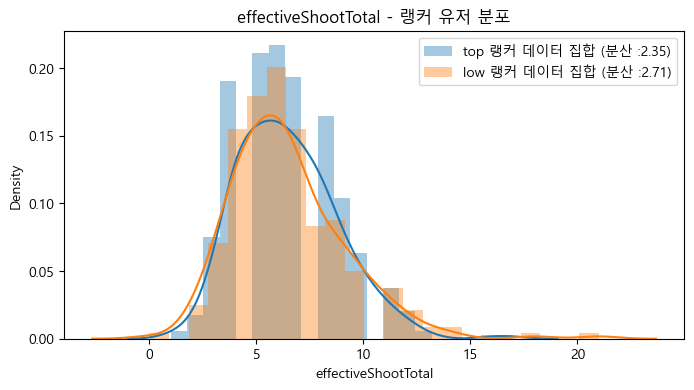

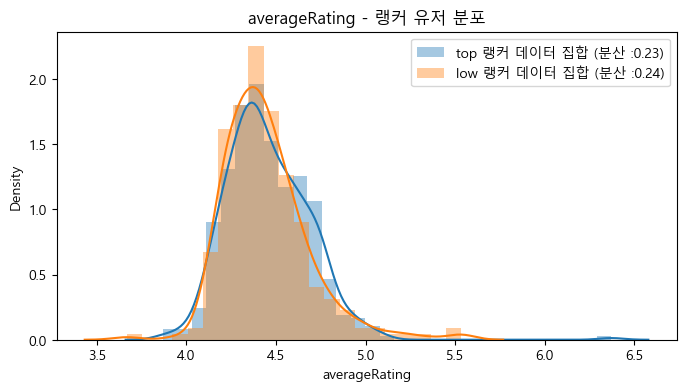

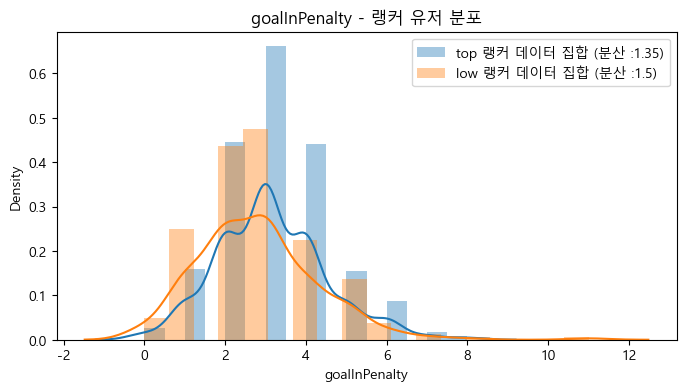

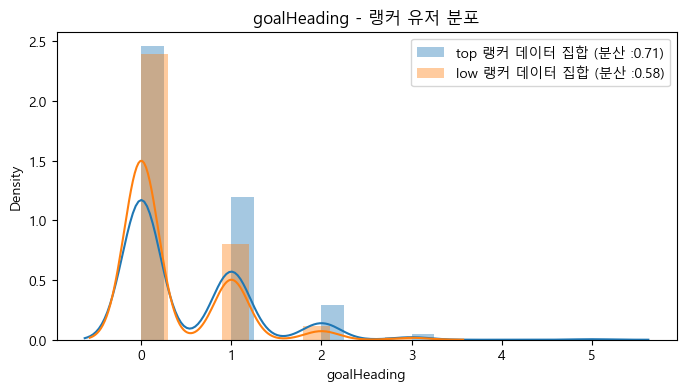

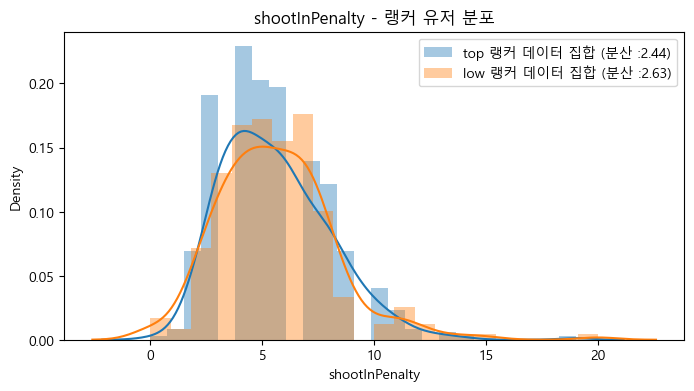

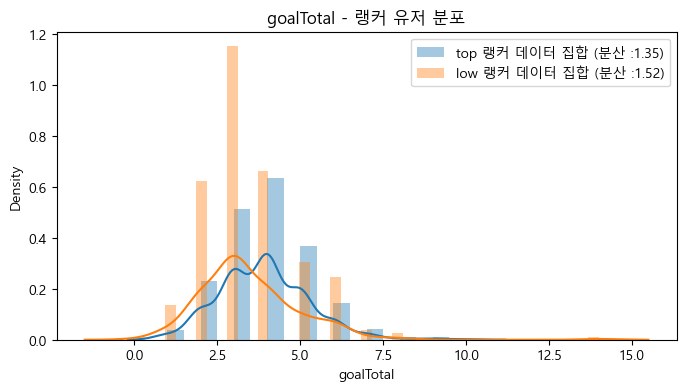

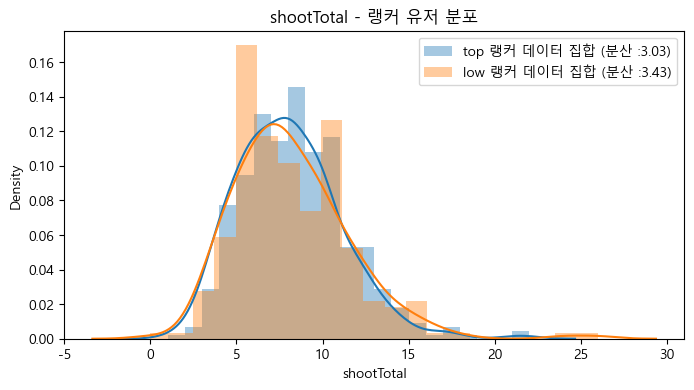

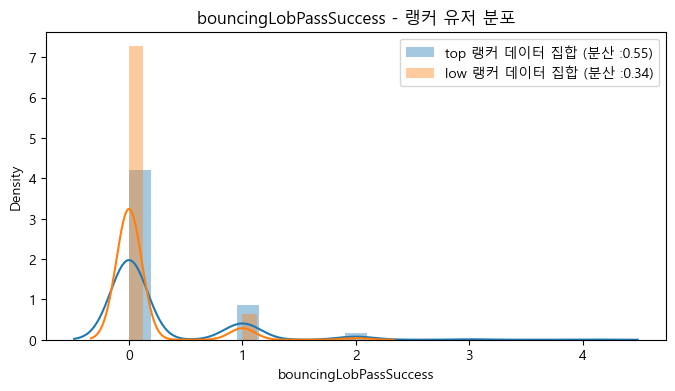

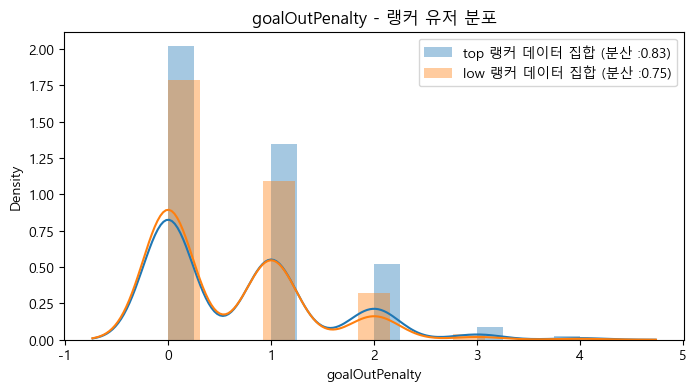

In [17]:
# 각 변수에 대한 분포 그래프를 개별적으로 시각화
for var in matching_variables:
    plt.figure(figsize=(8, 4))
    
    # top ranker와 low ranker의 분포 시각화
    sns.distplot(top_corr[var], kde=True, label=f"top 랭커 데이터 집합 (분산 :{np.round(top_corr[var].std(),2)})")
    sns.distplot(low_corr[var], kde=True, label=f"low 랭커 데이터 집합 (분산 :{np.round(low_corr[var].std(),2)})")

    plt.title(f'{var} - 랭커 유저 분포')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()


In [18]:
# 정규성 검정
for var in matching_variables:
    shapiro_test_group1 = stats.shapiro(top_corr[var])
    shapiro_test_group2 = stats.shapiro(low_corr[var])
    
    # 확인
    print("Top 랭커 Shapiro-Wilk Test:")
    print(f"Statistic: {shapiro_test_group1.statistic}, p-value: {shapiro_test_group1.pvalue}")
    
    print("Low 랭커 Shapiro-Wilk Test:")
    print(f"Statistic: {shapiro_test_group2.statistic}, p-value: {shapiro_test_group2.pvalue}")

Top 랭커 Shapiro-Wilk Test:
Statistic: 0.8840165360296997, p-value: 5.577987953017943e-18
Low 랭커 Shapiro-Wilk Test:
Statistic: 0.8822914608180269, p-value: 2.3390197750618007e-13
Top 랭커 Shapiro-Wilk Test:
Statistic: 0.6146193835983522, p-value: 1.3937405026175937e-30
Low 랭커 Shapiro-Wilk Test:
Statistic: 0.45996487732567914, p-value: 1.98451978582369e-27
Top 랭커 Shapiro-Wilk Test:
Statistic: 0.8252754371529697, p-value: 7.001669578852348e-22
Low 랭커 Shapiro-Wilk Test:
Statistic: 0.7498189211410324, p-value: 1.2074626179848158e-19
Top 랭커 Shapiro-Wilk Test:
Statistic: 0.9783814104351618, p-value: 2.802575893538518e-06
Low 랭커 Shapiro-Wilk Test:
Statistic: 0.8830313886210218, p-value: 2.6064002119127106e-13
Top 랭커 Shapiro-Wilk Test:
Statistic: 0.9608122268711735, p-value: 1.2280086837257922e-09
Low 랭커 Shapiro-Wilk Test:
Statistic: 0.9223347025474441, p-value: 1.867732000090035e-10
Top 랭커 Shapiro-Wilk Test:
Statistic: 0.9307308032204896, p-value: 1.1707220695724274e-13
Low 랭커 Shapiro-Wilk Test:


- 두 집단 모두 정규성 만족하지 않음

**모든 변수가 정규성을 만족하지 않으므로 맨휘트니 검정 진행**

In [20]:
# Mann-Whitney U 검정 결과 저장 리스트
mannwhitney_results = []

for var in list(matching_variables):
    # Mann-Whitney U 검정 수행
    u_stat, p_value = stats.mannwhitneyu(
        top_corr[var],  # top랭커 
        low_corr[var],   # low랭커
        alternative='two-sided'  # 양측 검정
    )
    
    # 결과 저장
    mannwhitney_results.append({'variable': var, 'u_stat': u_stat, 'p_value': p_value})

# 데이터프레임으로 변환
mannwhitney_df = pd.DataFrame(mannwhitney_results)

# p-value가 0.05보다 작은 변수만 남기기
filtered_mannwhitney_df = mannwhitney_df.loc[mannwhitney_df['p_value'] < 0.05]

# 확인
filtered_mannwhitney_df.sort_values('p_value', ascending=False)

variable   u_stat   p_value
3               possession  51736.0  0.003643
7              goalHeading  66076.5  0.003095
2             shootHeading  67512.0  0.001465
6            goalInPenalty  69107.0  0.000204
11  bouncingLobPassSuccess  66019.0  0.000117
1       bouncingLobPassTry  68938.5  0.000004
0         goalTotalDisplay  71593.0  0.000002
9                goalTotal  72144.5  0.000001

**Mann-Whitney U 검정 결과 유의한 변수**
- possession : 점유율
- shootHeading : 헤딩 슛 수
- goalInPenalty : 패널티 박스 골수
- goalHeading : 헤딩 골 수
- goalTotal : 총 골수
- bouncingLobPassSuccess : 바운싱 롭 패스 성공 수
- goalTotalDisplay : 게임 종료 후 골수
- bouncingLobPassTry : 바운싱 롭 패스 시도 수

- 위 9개의 변수의 유의확률이 유의수준5%기준 보다 작으므로 두 그룹에 해당 변수들은 차이가 있다고 할 수 있다. 

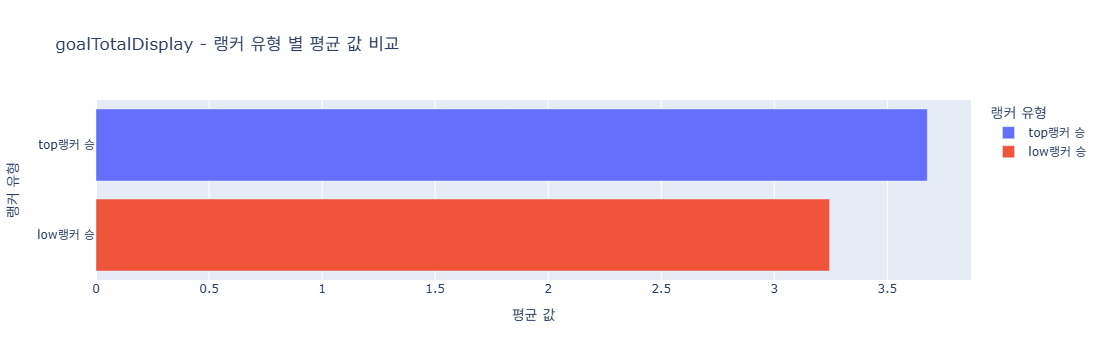

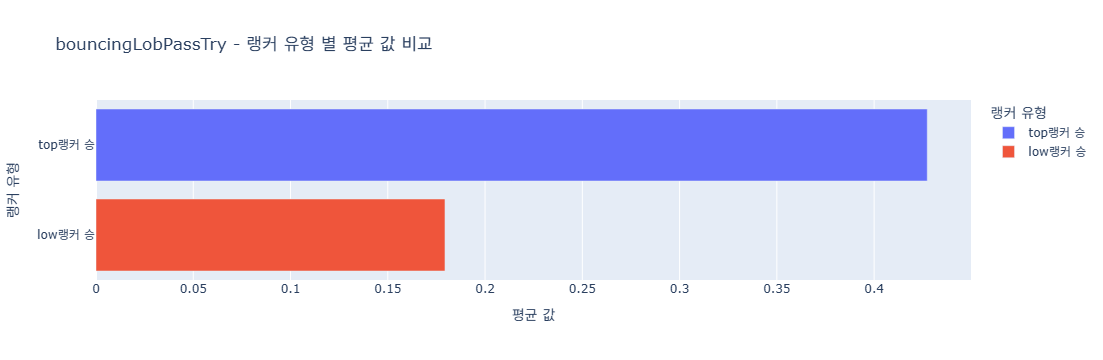

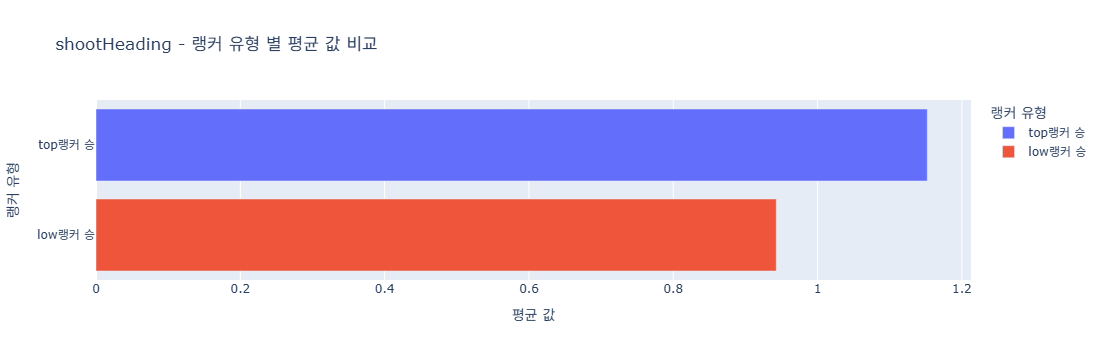

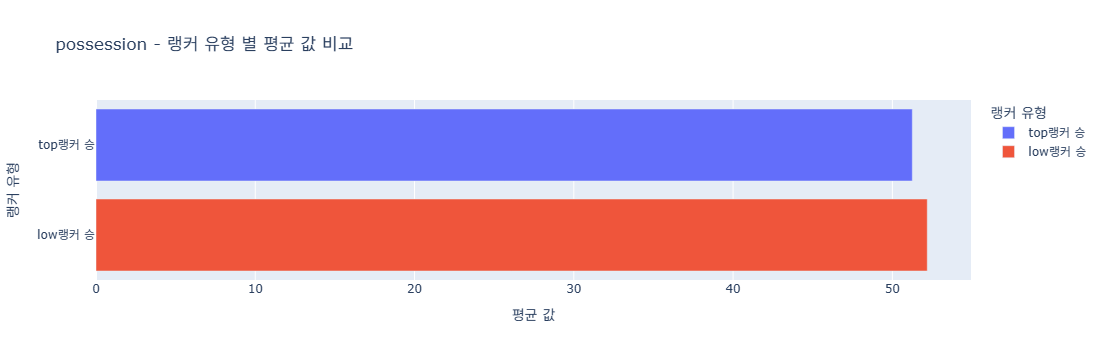

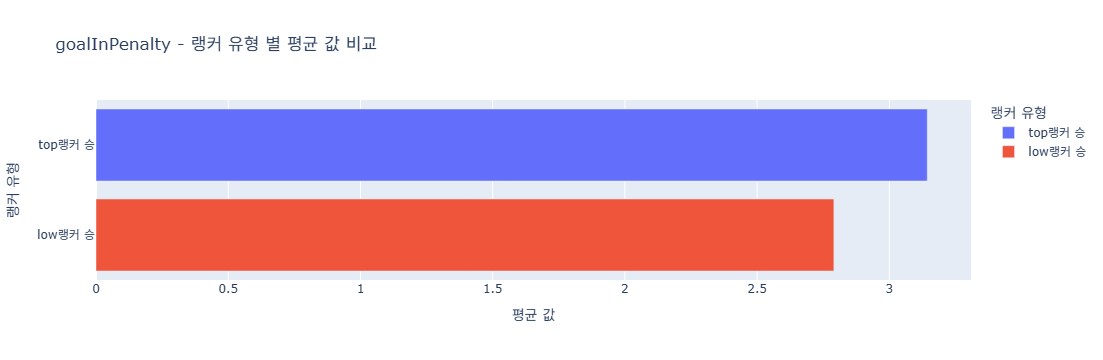

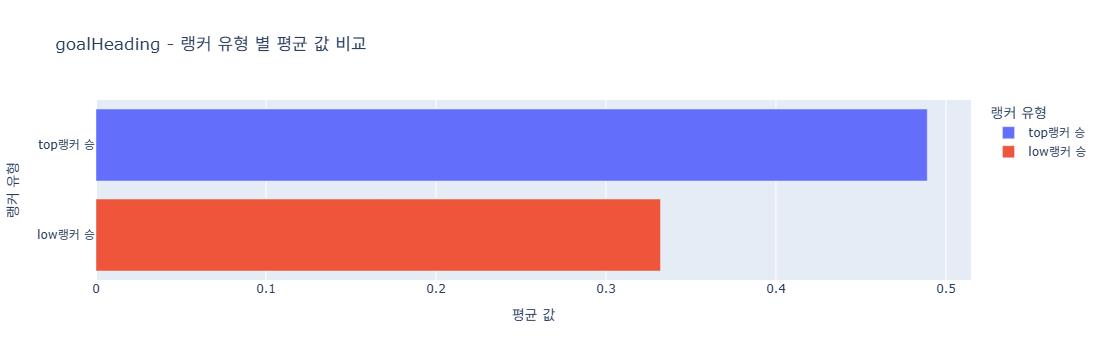

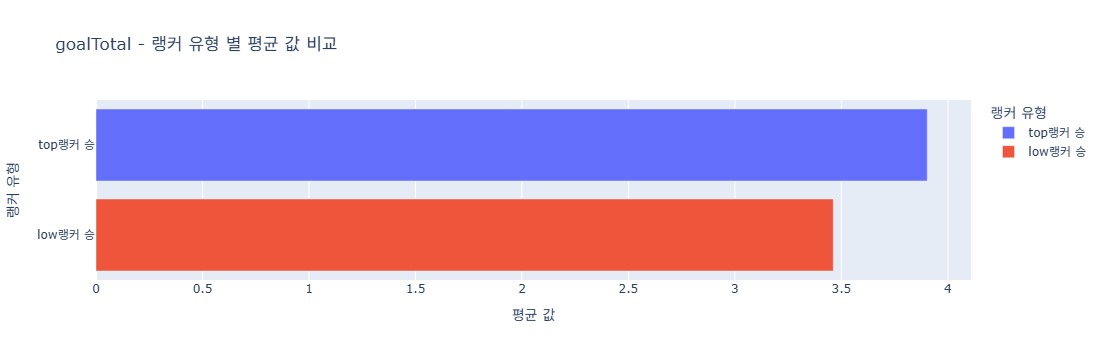

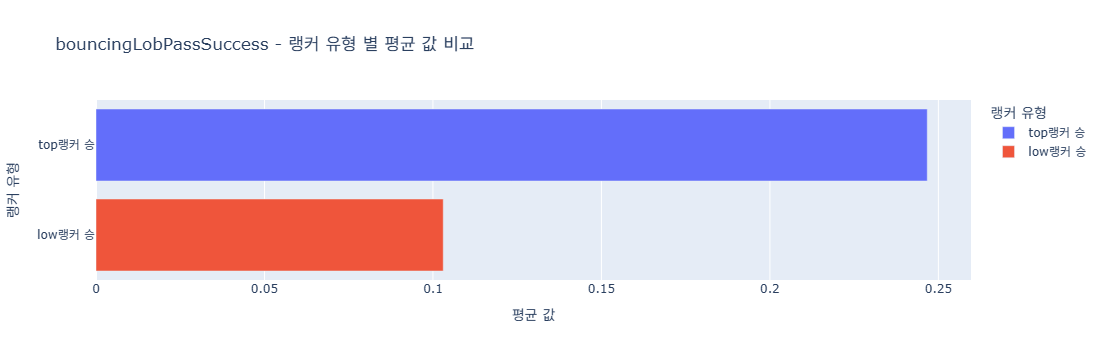

In [21]:
import plotly.express as px

# 유의미한 변수 선택
significant_vars = {row['variable']: {'u_stat': row['u_stat'], 'p_value': row['p_value']} 
                    for index, row in filtered_mannwhitney_df.iterrows()}

# 유의미한 변수의 평균 값
data_to_plot = []
for var in significant_vars.keys():
    data_to_plot.append({'랭커 유형': 'top랭커 승', '값': top_corr[var].mean(), '변수': var})
    data_to_plot.append({'랭커 유형': 'low랭커 승', '값': low_corr[var].mean(), '변수': var})

# 시각화 위한 df 생성
plot_df = pd.DataFrame(data_to_plot)

# 각 변수별로 시각화
for var in significant_vars.keys():
    fig = px.bar(plot_df[plot_df['변수'] == var], 
                 x='값', 
                 y='랭커 유형', 
                 color='랭커 유형', 
                 orientation='h',  
                 labels={'값': '평균 값', '랭커 유형': '랭커 유형'},
                 title=f'{var} - 랭커 유형 별 평균 값 비교')
    fig.show()

### 유의한 변수를 활용해 승부 예측 모델을 만들어보자

#### TOP 랭커 경기결과 분류 모델

In [22]:
top10_game['matchResult'].value_counts(normalize=True)

matchResult
승    0.500000
패    0.488987
무    0.011013
Name: proportion, dtype: float64

**Top 랭커 : 대부분 승, 패에 집중된 비율이다 - 연장전 제도가 있어서 그런것 같음**

In [23]:
# X, y 데이터 준비
X = top10_game[list(filtered_mannwhitney_df['variable'].unique())]
y = top10_game['matchResult']

# 라벨 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 학습,검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=.2, random_state=42, stratify=y_encoded)

# 모델 리스트
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
}

# 모델 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    print(f"{model_name}")
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

Random Forest
[[ 0  2  0]
 [ 0 77 14]
 [ 0 14 75]]
              precision    recall  f1-score   support

           무       0.00      0.00      0.00         2
           승       0.83      0.85      0.84        91
           패       0.84      0.84      0.84        89

    accuracy                           0.84       182
   macro avg       0.56      0.56      0.56       182
weighted avg       0.83      0.84      0.83       182

XGBoost
[[ 0  2  0]
 [ 0 74 17]
 [ 1 17 71]]
              precision    recall  f1-score   support

           무       0.00      0.00      0.00         2
           승       0.80      0.81      0.80        91
           패       0.81      0.80      0.80        89

    accuracy                           0.80       182
   macro avg       0.53      0.54      0.54       182
weighted avg       0.79      0.80      0.79       182

LightGBM
[[ 0  2  0]
 [ 0 76 15]
 [ 0 17 72]]
              precision    recall  f1-score   support

           무       0.00      0.00      0.

**승, 패에 대한 분류는 대체적으로 잘 해내는 편이지만, 무승부에 대한 분류는 전혀 수행해내지 못함 : 무승부 경기 데이터 부족**
- RandomForest가 전반적으로 좋은 정확도를 보임

#### LOW 랭커 경기결과 분류 모델

In [24]:
low_game['matchResult'].value_counts(normalize=True)

matchResult
승    0.435940
패    0.420965
무    0.143095
Name: proportion, dtype: float64

**Low 랭커 : top랭커보다는 무에 대한 경기 결과도 어느 정도 있음**

In [27]:
# X, y 데이터 준비
X2 = low_game[list(filtered_mannwhitney_df['variable'].unique())]
y2 = low_game['matchResult']

# 라벨 인코딩
label_encoder2 = LabelEncoder()
y2_encoded = label_encoder2.fit_transform(y2)

# 학습, 검증 데이터 분리
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2_encoded, test_size=.2, random_state=42, stratify=y2_encoded)

# 모델 리스트
models2 = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
}

# 모델 학습 및 평가
for model_name2, model2 in models2.items():
    model2.fit(X_train2, y_train2)
    y_val_pred2 = model2.predict(X_val2)
    print(f"{model_name2}")
    print(confusion_matrix(y_val2, y_val_pred2))
    print(classification_report(y_val2, y_val_pred2, target_names=label_encoder2.classes_))

Random Forest
[[ 1  8  8]
 [ 3 46  4]
 [ 5  8 38]]
              precision    recall  f1-score   support

           무       0.11      0.06      0.08        17
           승       0.74      0.87      0.80        53
           패       0.76      0.75      0.75        51

    accuracy                           0.70       121
   macro avg       0.54      0.56      0.54       121
weighted avg       0.66      0.70      0.68       121

XGBoost
[[ 0  9  8]
 [ 5 40  8]
 [ 5 10 36]]
              precision    recall  f1-score   support

           무       0.00      0.00      0.00        17
           승       0.68      0.75      0.71        53
           패       0.69      0.71      0.70        51

    accuracy                           0.63       121
   macro avg       0.46      0.49      0.47       121
weighted avg       0.59      0.63      0.61       121

LightGBM
[[ 1  9  7]
 [ 2 44  7]
 [ 6  7 38]]
              precision    recall  f1-score   support

           무       0.11      0.06      0.

**TOP랭커 모델 결과와 마찬가지로 무승부에 대한 분류는 잘 해내지 못함, 그래도 무승부 경기 데이터가 좀 더 있기때문에 아주 조금은 분류 가능함**
- LightGBM이 무승부 클래스에서 정밀도, 재현율, f1-score이 그나마 조금 높으며, macro avg도 더 높음
- macro avg : 클래스 불균형 있는 데이터에서 각 클래스 성능 공정하게 평가 가능함

### TOP / LOW 랭커 데이터셋, 모델 저장

In [34]:
import os
import joblib

# 디렉토리 경로
directory = 'FC_Online_save'

# 디렉토리 생성 (존재하지 않을 경우)
if not os.path.exists(directory):
    os.makedirs(directory)

# 데이터셋 저장
joblib.dump(top10_game, 'FC_Online_save/top_ranker_data.pkl')
joblib.dump(low_game, 'FC_Online_save/low_ranker_data.pkl')

# 모델 저장
joblib.dump(models["Random Forest"], 'FC_Online_save/top_ranker_model.pkl')
joblib.dump(models2["LightGBM"], 'FC_Online_save/low_ranker_model.pkl')

# 라벨 인코더 저장
joblib.dump(label_encoder, 'FC_Online_save/top_ranker_label_encoder.pkl')
joblib.dump(label_encoder2, 'FC_Online_save/low_ranker_label_encoder.pkl')

['FC_Online_save/low_ranker_label_encoder.pkl']